### Importações

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulação Local
Com base em **autômatos celulares**

### Criação da classe Autômato Celular Contador de Distância}

In [2]:
class ACCD:

    def __init__(self, tamanho):

        # Atributos do objeto
        self.tamanho = tamanho + 1
        self.center = self.tamanho // 2
        
        # Tupla (dx, dy) com valores separados pelas matrizes
        self.dx = np.full((self.tamanho, self.tamanho), np.inf)
        self.dy = np.full((self.tamanho, self.tamanho), np.inf)

        self.obstaculo = np.zeros((self.tamanho, self.tamanho), dtype=bool)

        self.range_i = range(1, self.tamanho - 1)
        self.range_j = range(1, self.tamanho - 1)

        self.capturas = []

    def get(self, i, j):
        # Retorna a tupla (dx, dy)ij

        if 0 <= i < self.tamanho and 0 <= j < self.tamanho:
            return (self.dx[i, j], self.dy[i, j])
            
        return (np.inf, np.inf)

    def set(self, i, j, valor=(0,0)):
        # Atualiza a tupla (dx, dy)ij

        if 0 <= i < self.tamanho and 0 <= j < self.tamanho:
            self.dx[i,j], self.dy[i,j] = valor    

    def set_obstaculo(self, i, j):
        if 0 <= i < self.tamanho and 0 <= j < self.tamanho:
            self.obstaculo[i,j] = True
            self.dx[i,j] = np.inf
            self.dy[i,j] = np.inf

    def remove(self, i, j):
        if 0 <= i < self.tamanho and 0 <= j < self.tamanho:
            self.obstaculo[i,j] = False
            self.dx[i,j] = np.inf
            self.dy[i,j] = np.inf


    def distancia_vizinhos(self, i, j):
        # Vizinhos do tipo von Neumann
        # Soma todos os vizinhos com vetores unitarios correspondetes
        
        cima     = (self.dx[i-1, j]    , self.dy[i-1, j] + 1) # + (0,1)
        baixo    = (self.dx[i+1, j]    , self.dy[i+1, j] + 1) # + (0,1)
        esquerda = (self.dx[i, j-1] + 1, self.dy[i, j-1]    ) # + (1,0)
        direita  = (self.dx[i, j+1] + 1, self.dy[i, j+1]    ) # + (1,0)
        
        return [cima, baixo, esquerda, direita]

    def novo_estado(self):
        
        novo_dx = self.dx.copy()
        novo_dy = self.dy.copy()

        # Percorrendo matriz dentro da borda com valor de 1 célula
        # de distância das extremidades.
        for i in self.range_i:
            for j in self.range_j:

                if self.obstaculo[i,j]: continue
    
                # Melhor distância percorrida: raiz_quadrada(delta)
                x, y = self.dx[i,j], self.dy[i,j]
                delta = x**2 + y**2
    
                for vdx, vdy in self.distancia_vizinhos(i,j):
                    vdelta = vdx**2 + vdy**2
                    
                    if vdelta < delta:
                        delta = vdelta
                        novo_dx[i,j] = vdx
                        novo_dy[i,j] = vdy
                        
        self.dx = novo_dx
        self.dy = novo_dy

    def processar(self, tempos):
        
        for tempo in range(tempos[-1]+1):
            self.novo_estado()

            if tempo in tempos:
                self.capturas.append(self.mapa_magnitude())
                

    def mapa_magnitude(self):
        # Calcula o mapa final de distâncias (Módulo do Vetor D)
        
        mapa = np.sqrt(self.dx**2 + self.dy**2)
        mapa[mapa > 100] = np.nan # Limpa o fundo

        return mapa[1:-1, 1:-1]

    def show(self, cmap="viridis", titulo="Mapa", isseno=False):
        
        if self.capturas:
            mapas = self.capturas
        else:
            mapas = [self.mapa_magnitude()]
        
        for idx, mapa in enumerate(mapas):
    
            if isseno:
                mapa = np.sin(mapa)
    
            plt.figure()
            im = plt.imshow(mapa, cmap=cmap, origin="lower")
            plt.colorbar(im)
            plt.title(f"{titulo} - captura {idx}")
            plt.xticks([])
            plt.yticks([])
            plt.show()

        

Testes da classe criada:

In [3]:
accd_teste = ACCD(5)
accd_teste.set(1,1)

In [4]:
accd_teste.dx

array([[inf, inf, inf, inf, inf, inf],
       [inf,  0., inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf]])

In [5]:
accd_teste.dy

array([[inf, inf, inf, inf, inf, inf],
       [inf,  0., inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf]])

In [6]:
accd_teste.tamanho

6

In [7]:
accd_teste.center

3

In [8]:
accd_teste.distancia_vizinhos(0,1)

[(np.float64(inf), np.float64(inf)),
 (np.float64(0.0), np.float64(1.0)),
 (np.float64(inf), np.float64(inf)),
 (np.float64(inf), np.float64(inf))]

In [9]:
accd_teste.processar(tempos=[1,2,3,4,5])

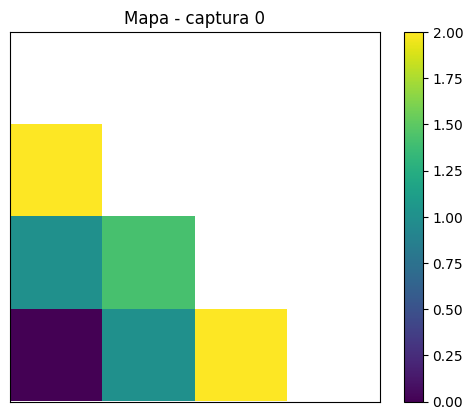

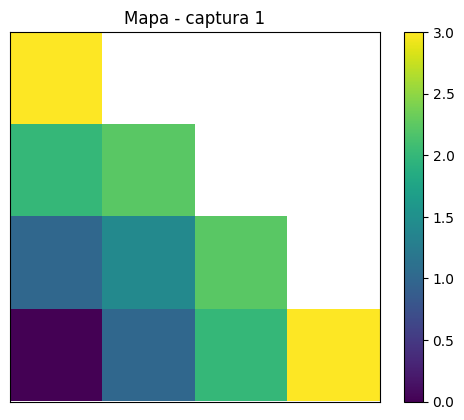

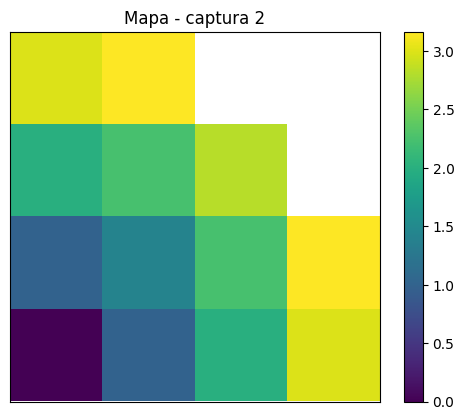

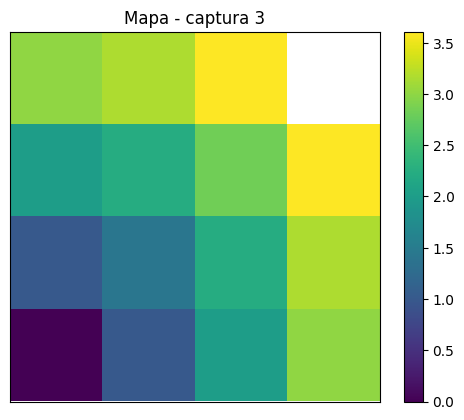

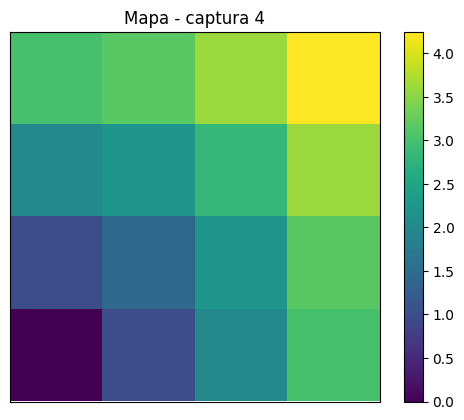

In [10]:
accd_teste.show()

---

### Ondas Multiplas

- Dois pontos distantes

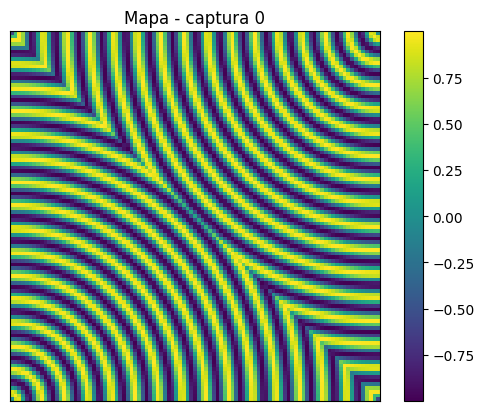

In [11]:
accd_dois_pontos = ACCD(100)
accd_dois_pontos.set(1,1)
accd_dois_pontos.set(99,99)
accd_dois_pontos.processar(tempos=[100])
accd_dois_pontos.show(isseno=True)

- Frente de onda linear

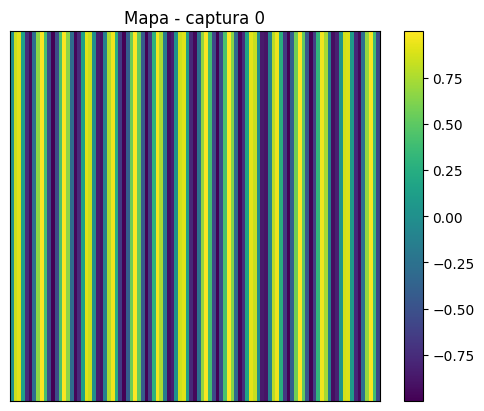

In [12]:
accd_dois_pontos = ACCD(100)
[accd_dois_pontos.set(i,1) for i in range(100)] 
accd_dois_pontos.processar(tempos=[100])
accd_dois_pontos.show(isseno=True)

- Hipótese de Hyugens

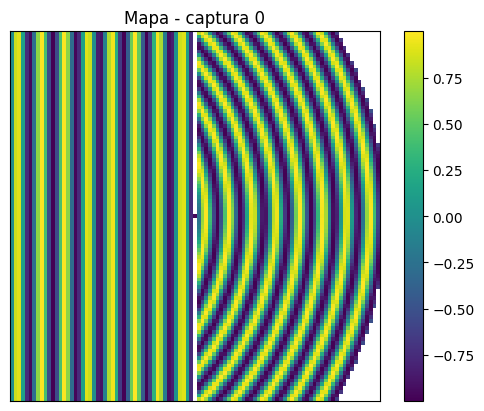

In [13]:
accd_dois_pontos = ACCD(100)
[accd_dois_pontos.set(i,1) for i in range(100)] 
center = accd_dois_pontos.center
[accd_dois_pontos.set_obstaculo(i, center) for i in range(100) if i != center]
accd_dois_pontos.processar(tempos=[200])
accd_dois_pontos.show(isseno=True)